# Neural Network

### MLPClassifier
A multilayer perceptron (MLP) is a feedforward artificial neural network model that maps sets of input data onto a set of appropriate outputs.

> class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)


Activation Functions
* BinaryStep
* Gaussian
* HyperbolicTangent
* Parametric Rectified Linear Unit
* Sigmoid (default)
* Thresholded Rectified Linear Unit


_Resources_
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
* https://php-ml.readthedocs.io/en/latest/machine-learning/neural-network/multilayer-perceptron-classifier/

In [6]:
# Data Processing
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Ignore the warnings if any
import warnings  
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Load the dataset
df = pd.read_csv("../data/lab2_df.csv")

# define variables for classificaiton training
variables_ = ['age', 'fnlwgt', 'educationNum', 'hoursPerWeek', 'netCapital', 'isWhite', 'isMarried', 'isHusband', 'USA', 'sex_Male', 'jobtype_government', 'jobtype_other', 'jobtype_private']
y=df['income']
X=df[variables_]

# test train scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# prepare cross validation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [7]:
from sklearn.neural_network import MLPClassifier

parms = [1, 0.1, 0.001, 3 ]
for param in parms:
    net = MLPClassifier(random_state=0, max_iter=1000, alpha=param)
    net.fit(X_train, y_train)
    print("")
    print("---- Accuracy Results for alpha={} ----".format(param))
    print("net alpha={} Train accuracy: {:.3f}".format(param,cross_val_score(net, X_train, y_train,scoring='roc_auc',cv=kfold).mean()))
    print("net alpha={} Test accuracy: {:.3f}".format(param,cross_val_score(net,  X_test, y_test,scoring='roc_auc',cv=kfold).mean()))
    


---- Accuracy Results for alpha=1 ----
net alpha=1 Train accuracy: 0.880
net alpha=1 Test accuracy: 0.876

---- Accuracy Results for alpha=0.1 ----
net alpha=0.1 Train accuracy: 0.891
net alpha=0.1 Test accuracy: 0.877

---- Accuracy Results for alpha=0.001 ----
net alpha=0.001 Train accuracy: 0.888
net alpha=0.001 Test accuracy: 0.869

---- Accuracy Results for alpha=3 ----
net alpha=3 Train accuracy: 0.870
net alpha=3 Test accuracy: 0.868


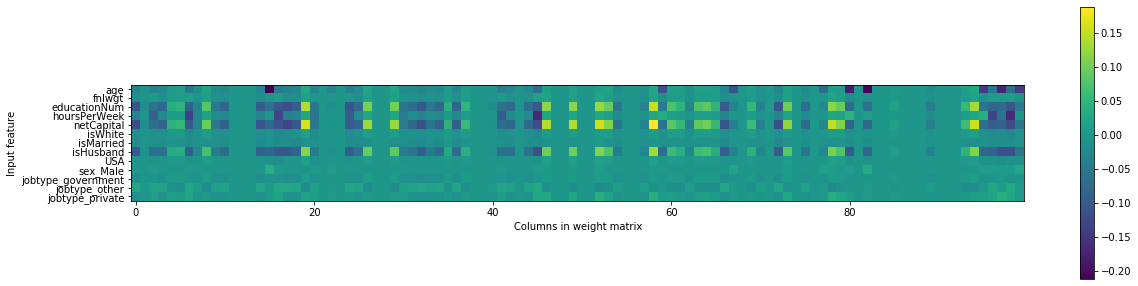

In [11]:
plt.figure(figsize=(20, 5))
plt.imshow(net.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(variables_)), variables_)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


In [5]:
from sklearn.metrics import accuracy_score,roc_curve,auc,precision_score,recall_score,f1_score,roc_auc_score

def evaluate(pre,pre_pro,y):
    acc=accuracy_score(y,pre)
    model_auc=roc_auc_score(y,pre)
    model_pre=precision_score(y,pre)
    model_recall=recall_score(y,pre)
    model_f1=f1_score(y,pre)
    fpr, tpr, thresholds =roc_curve(y,pre_pro[:,1])
    return acc,model_auc,model_pre,model_recall,model_f1,fpr,tpr


def model_eval(models):
    for name,model in models:
        print(name,'Start training...')
        model.fit(X_train,y_train)

        print("----{} Classifier Hyperparameter tuning Results ----".format(name))
        print("Best {} Score: {} ".format(name, model.best_score_))
        print("Best {} Parameters: {} ".format(name,model.best_params_))

        preds=model.predict(X_test)
        pro=model.predict_proba(X_test)
        acc,model_auc,model_pre,model_recall,model_f1,fpr,tpr=evaluate(preds,pro,y_test)

        start = time.time()
        model_results = cross_val_score(model, X_test, y_test,scoring='roc_auc',cv=kfold)
        end = time.time() - start
        print("")
        print("")
        print("Elapsed Time: %f" % (end))
        print("---- model selection ----")
        print("")
        print("{} Classifier test CV results: {}".format(name,model_results ))
        print("{} Classifier test MEAN CV results: {}".format(name,model_results.mean()))

        model_prediction = model.predict(X_test)
        print("")
        print("")
        print("---- Classification Report ----")
        print(classification_report(y_test, model_prediction))

        model_plot(fpr,tpr,name)

In [6]:
param_grid = [{'early_stopping': [True],
               'alpha': [0.0001, 0.001, 0.01],
               'hidden_layer_sizes': [32, 64, (64, 64), 128, 256]
              }]
net = GridSearchCV(MLPClassifier(), param_grid, cv=kfold, scoring='roc_auc',n_jobs=-1)

model_eval([("NeuralNet", net)])

NeuralNet Start training...
----NeuralNet Classifier Hyperparameter tuning Results ----
Best NeuralNet Score: 0.8897890549610346 
Best NeuralNet Parameters: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': 128} 


Elapsed Time: 566.286960
---- model selection ----

NeuralNet Classifier test CV results: [0.87400532 0.8947751  0.84112416 0.88148371 0.86538713 0.89483655
 0.85417534 0.87412851 0.86295525 0.87670395]
NeuralNet Classifier test MEAN CV results: 0.8719575035316701


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      4966
           1       0.73      0.48      0.58      1547

    accuracy                           0.83      6513
   macro avg       0.79      0.71      0.74      6513
weighted avg       0.82      0.83      0.82      6513



NameError: name 'model_plot' is not defined